# Delicious Asian and Indian Cuisines 

In [1]:
import pandas as pd # Data processing
import matplotlib.pyplot as plt #Data Visualisation
import matplotlib as mpl #Data Visualisation
import numpy as np #Data processing
from imblearn.over_sampling import SMOTE # Data Balancing

In [2]:
df  = pd.read_csv('../data/cuisines.csv')

In [3]:
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


<AxesSubplot: >

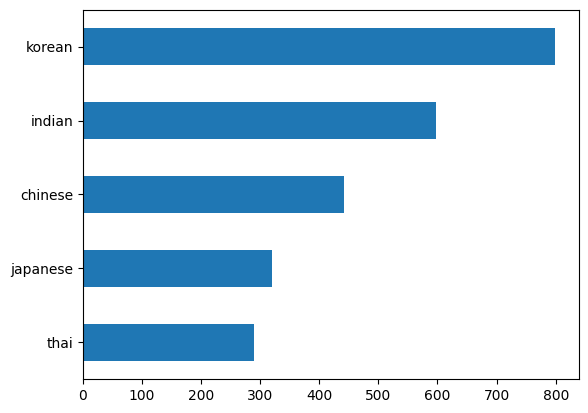

In [9]:
df.cuisine.value_counts(ascending=True).plot.barh()

There are different types of cuisine, but the ingedients may differ by cuisine, lets divide the cuisines into its own dataframes

In [58]:
df_korean = df[df["cuisine"]== "korean"]
df_thai = df[df["cuisine"]== "thai"]
df_japanese = df[df["cuisine"]== "japanese"]
df_indian = df[df["cuisine"]== "indian"]
df_chinese = df[df["cuisine"]== "chinese"]

In [18]:
print(df_korean.shape)
print(df_thai.shape)
print(df_indian.shape)
print(df_chinese.shape)
print(df_japanese.shape)


(799, 385)
(289, 385)
(598, 385)
(442, 385)
(320, 385)


In [20]:
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Lets look at the most common ingredients among the different cuisines we have in this data set:

In [64]:
#Lets understand the most used ingredient in each df

def main_ingredient(df):
    df=df.drop(['Unnamed: 0','cuisine'],axis=1)
    df=df.T.sum(axis=1).to_frame('value')
    df=df[(df.T != 0).any()]
    df.sort_values('value',ascending=False,inplace=True)
    return df

    

<AxesSubplot: >

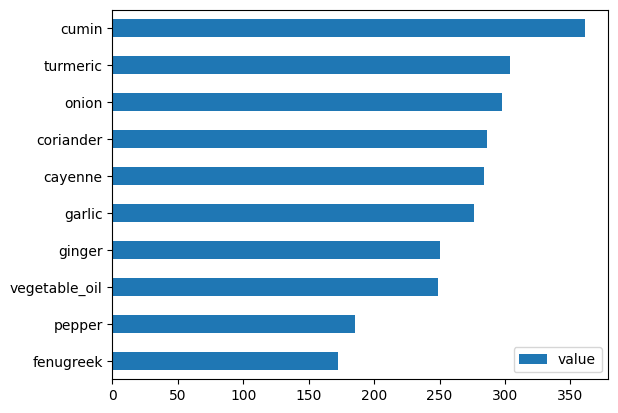

In [68]:
indian_ingredients = main_ingredient(df_indian)
indian_ingredients.head(10).sort_values('value',ascending=True).plot.barh()

<AxesSubplot: >

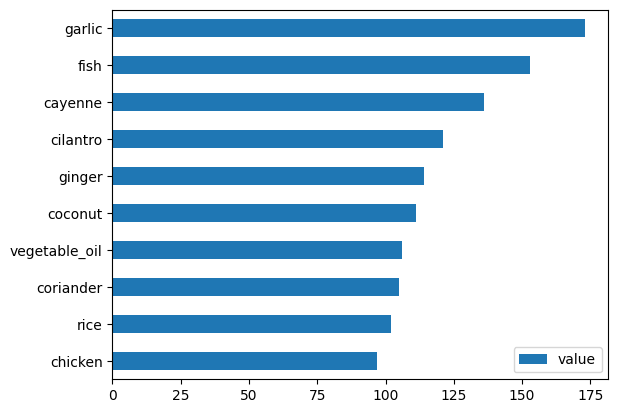

In [69]:
thai_ingredients = main_ingredient(df_thai)
thai_ingredients.head(10).sort_values('value',ascending=True).plot.barh()

<AxesSubplot: >

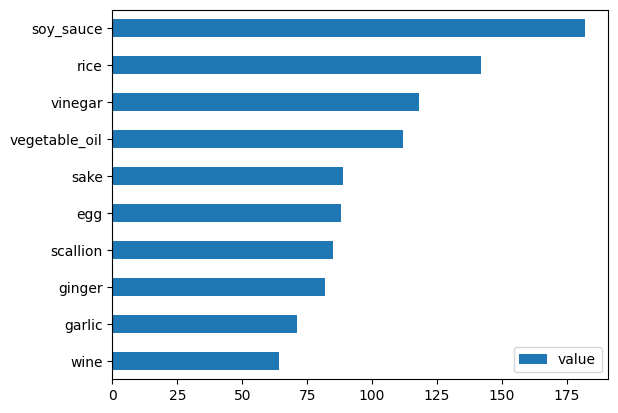

In [70]:
japanese_ingredients = main_ingredient(df_japanese)
japanese_ingredients.head(10).sort_values('value',ascending=True).plot.barh()

<AxesSubplot: >

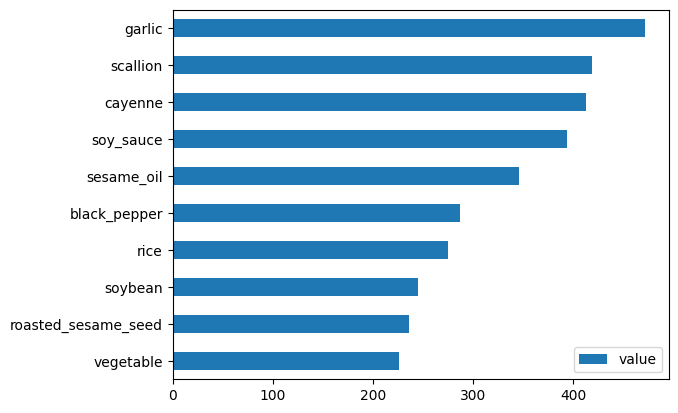

In [71]:
korean_ingredients = main_ingredient(df_korean)
korean_ingredients.head(10).sort_values('value',ascending=True).plot.barh()

<AxesSubplot: >

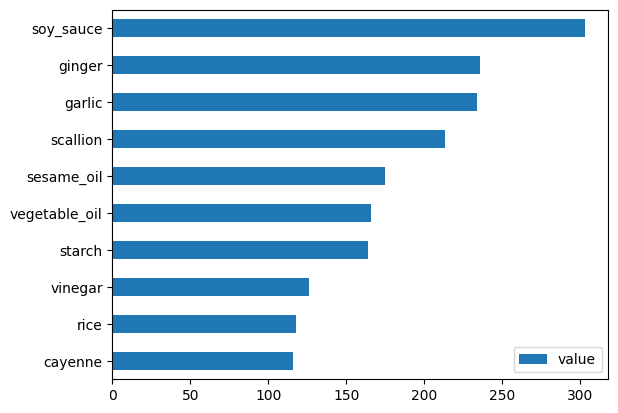

In [72]:
chinese_ingredients = main_ingredient(df_chinese)
chinese_ingredients.head(10).sort_values('value',ascending=True).plot.barh()

Across all the mentioned cuisines garlic, rice and ginger are repeated among multiple cuisines. So we will drop these ingredients from the main frame to avoid the ML model to create confusion among the different cuisines.

In [74]:
df_features = df.drop(['Unnamed: 0','cuisine','garlic','rice','ginger'],axis=1)
df_labels = df.cuisine
df_features.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Balance dataset

We are going to balance the dataset to have a better results at classifying the cuisines. We dont want the ML to predict one class more frequently than others just because we have more data for one particular class. So in other words, we try to remove the skewness by balancing the data using SMOTE, "Synthetic Minority Over-sampling Technique. Lets see how that works.
If you remember, our labels are imbalanced where we have most data from korean cuisine, and least data from thai cuisine.

In [77]:
df_labels.value_counts()

korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64

Now lets see when we apply SMOTE, how the data will be balanced:

In [78]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(df_features, df_labels)

In [79]:
transformed_label_df.value_counts()

indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: cuisine, dtype: int64

You see above by using SMOTE, we have rebalanced the data so that all of the cuisines are balanced equally, which in this case to the same value as the korean cuisine. Now lets concatenate the features and labels back together and start the classifying process.

In [80]:
transformed_df= pd.concat([transformed_label_df,transformed_feature_df],axis=1,join="outer")

Lets save the cleaned data in the folder

In [82]:
transformed_df.head()
transformed_df.to_csv("../data/cleaned_cuisines.csv")